### In this notebook we use tensorflow CNN model to find waldo.

In [96]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

from img_gen import create_sample
import cv2

In [97]:
# creating waldo images

create_sample(64,5000)

In [98]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    '../data/selfmade',
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(64, 64),
    batch_size=32,
    shuffle=True)

print(test_ds.class_names)

Found 10347 files belonging to 2 classes.
Using 8278 files for training.
Using 2069 files for validation.
['notwaldo', 'waldo']


In [99]:
yesset = tf.keras.utils.image_dataset_from_directory(
    '../data/selfmade/',
    seed=123,
    image_size=(64, 64),
    batch_size=32)

print(yesset.class_names)

Found 10347 files belonging to 2 classes.
['notwaldo', 'waldo']


In [100]:
notset = tf.keras.utils.image_dataset_from_directory(
    '../data/src1/notwaldo',
    seed=123,
    image_size=(64, 64),
    batch_size=32)

print(notset.class_names)

Found 5337 files belonging to 1 classes.
['notwaldo']


In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (16, 16), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((5, 5)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model2 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_shape=(64, 64, 3),
    classes=2
)


In [102]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# both = yesset.concatenate(train_ds)
model2.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=10)
# history2 = model2.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10


2024-06-09 00:13:46.151704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8278]
	 [[{{node Placeholder/_4}}]]
2024-06-09 00:13:46.151923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8278]
	 [[{{node Placeholder/_0}}]]


259/259 [==============================] - ETA: 0s - loss: 1.2613 - accuracy: 0.5638

2024-06-09 00:14:08.824456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2069]
	 [[{{node Placeholder/_4}}]]
2024-06-09 00:14:08.824614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2069]
	 [[{{node Placeholder/_4}}]]


259/259 [==============================] - 25s 94ms/step - loss: 1.2613 - accuracy: 0.5638 - val_loss: 0.6089 - val_accuracy: 0.6641
Epoch 2/10
259/259 [==============================] - 25s 95ms/step - loss: 0.4101 - accuracy: 0.8088 - val_loss: 0.1339 - val_accuracy: 0.9517
Epoch 3/10
259/259 [==============================] - 24s 93ms/step - loss: 0.0544 - accuracy: 0.9855 - val_loss: 0.0214 - val_accuracy: 0.9966
Epoch 4/10
259/259 [==============================] - 24s 93ms/step - loss: 0.0178 - accuracy: 0.9965 - val_loss: 0.0176 - val_accuracy: 0.9961
Epoch 5/10
259/259 [==============================] - 24s 94ms/step - loss: 0.0096 - accuracy: 0.9982 - val_loss: 0.0152 - val_accuracy: 0.9976
Epoch 6/10
259/259 [==============================] - 24s 94ms/step - loss: 0.0077 - accuracy: 0.9990 - val_loss: 0.0204 - val_accuracy: 0.9971
Epoch 7/10
259/259 [==============================] - 25s 96ms/step - loss: 0.0094 - accuracy: 0.9984 - val_loss: 0.0202 - val_accuracy: 0.9952
Epo

In [ ]:
from collections import Counter

label_counter = Counter()

# Iterate through the dataset
for images, labels in test_ds:
    # Convert the labels to numpy array if they are in tensor format
    labels_np = labels.numpy()
    
    # Update the counter with the labels in the current batch
    label_counter.update(labels_np)

# Print the number of elements for each class
for label, count in label_counter.items():
    print(f"Class {label}: {count} elements")

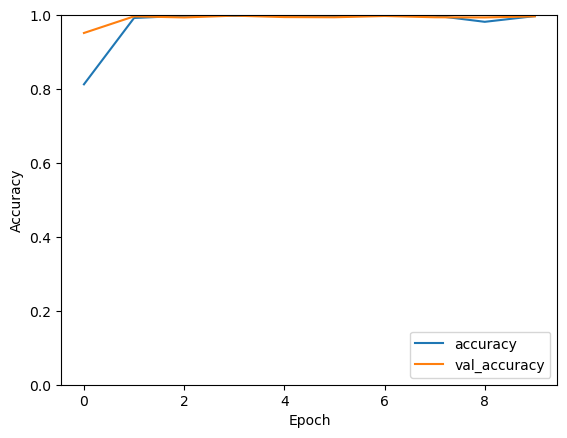

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')


In [ ]:

test_loss, test_acc = model.evaluate(yesset, verbose=2)

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

predictions = model.predict(test_ds)

print(predictions[10])

2024-06-09 00:05:00.203016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10347]
	 [[{{node Placeholder/_4}}]]
2024-06-09 00:05:00.203312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10347]
	 [[{{node Placeholder/_4}}]]


324/324 - 9s - loss: 0.0090 - accuracy: 0.9986 - 9s/epoch - 27ms/step
65/65 - 2s - loss: 0.0138 - accuracy: 0.9976 - 2s/epoch - 26ms/step
65/65 [==============================] - 2s 27ms/step
[-28.950726  27.738592]


In [ ]:
import os
directory_path = '../data/src1/64'
pref = "4_"
filenames = [(f,'waldo') for f in os.listdir(directory_path+'/waldo') if f.startswith(pref)]+[(f, 'notwaldo') for f in os.listdir(directory_path+'/notwaldo') if f.startswith(pref)]
filenames.sort()
filenames

[('4_0_0.jpg', 'notwaldo'),
 ('4_0_1.jpg', 'notwaldo'),
 ('4_0_10.jpg', 'notwaldo'),
 ('4_0_11.jpg', 'notwaldo'),
 ('4_0_12.jpg', 'notwaldo'),
 ('4_0_13.jpg', 'notwaldo'),
 ('4_0_14.jpg', 'notwaldo'),
 ('4_0_15.jpg', 'notwaldo'),
 ('4_0_2.jpg', 'notwaldo'),
 ('4_0_3.jpg', 'notwaldo'),
 ('4_0_4.jpg', 'notwaldo'),
 ('4_0_5.jpg', 'notwaldo'),
 ('4_0_6.jpg', 'notwaldo'),
 ('4_0_7.jpg', 'notwaldo'),
 ('4_0_8.jpg', 'notwaldo'),
 ('4_0_9.jpg', 'notwaldo'),
 ('4_10_0.jpg', 'notwaldo'),
 ('4_10_1.jpg', 'notwaldo'),
 ('4_10_10.jpg', 'notwaldo'),
 ('4_10_11.jpg', 'notwaldo'),
 ('4_10_12.jpg', 'notwaldo'),
 ('4_10_13.jpg', 'notwaldo'),
 ('4_10_14.jpg', 'notwaldo'),
 ('4_10_15.jpg', 'notwaldo'),
 ('4_10_2.jpg', 'notwaldo'),
 ('4_10_3.jpg', 'notwaldo'),
 ('4_10_4.jpg', 'notwaldo'),
 ('4_10_5.jpg', 'notwaldo'),
 ('4_10_6.jpg', 'notwaldo'),
 ('4_10_7.jpg', 'notwaldo'),
 ('4_10_8.jpg', 'notwaldo'),
 ('4_10_9.jpg', 'notwaldo'),
 ('4_11_0.jpg', 'notwaldo'),
 ('4_11_1.jpg', 'notwaldo'),
 ('4_11_10.jpg', '

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
correct=0
incorrect=0
incorrect_files=[]
correct_files=[]
# print(filenames)
for fname, true in filenames:
    img = image.load_img(f'../data/src1/64/{true}/{fname}', target_size=(64, 64, 3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Normalize the image to match the training data
    
    # Predict the class
    prediction = model.predict(img_array, verbose =0)
    predicted_class = 'waldo' if prediction[0][0] < prediction[0][1] else 'notwaldo'
    # if true == 'waldo':
        # print(true, prediction)
    
    # Print the prediction
    if predicted_class==true:
        correct += 1
        correct_files+=[f'../data/src1/64/{true}/{fname}']
    else:
        incorrect_files+=[f'../data/src1/64/{true}/{fname}']
        incorrect += 1
    # print(f'Predicted class: {predicted_class} with {prediction[0]}\t{"CORRECT" if predicted_class == True else "INCORRECT"}')
    
    # Optionally, display the image
    # plt.imshow(img)
    # plt.title(f'Predicted: {predicted_class}')
    # plt.show()
print(correct, incorrect)


1/1 [==============================] - 0s 13ms/step
254 2


In [ ]:
counter =0
for f in correct_files:
    if f.startswith('../data/src1/64/notwaldo'):
        counter+=1
print(counter)
counter =0
for f in incorrect_files:
    if f.startswith('../data/src1/64/waldo'):
        counter-=1 

print(counter)    

254
-2
